In [1]:
import pandas as pd
# import wget
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Download the data (public github)
# !wget -N https://github.com/fiddler-labs/p2p-lending-data/raw/refs/heads/master/raw_data/accepted_2007_to_2018Q3.csv.gz

In [4]:
df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')

/var/folders/6s/bfbnxg_x46gfcltpcwwr67200000gn/T/ipykernel_62010/2329708970.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q3.csv.gz')


In [5]:
pd.set_option('display.max_columns', None)
print(df.columns.tolist())
print(f'Total number of columns: {len(df.columns)}')

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [6]:
df.groupby(['loan_status']).size()

loan_status
Charged Off                                             254777
Current                                                 822105
Default                                                     32
Does not meet the credit policy. Status:Charged Off        761
Does not meet the credit policy. Status:Fully Paid        1988
Fully Paid                                             1011841
In Grace Period                                          12458
Late (16-30 days)                                         5442
Late (31-120 days)                                       22852
dtype: int64

In [7]:
df = df[df['loan_status'].isin(['Charged Off', 'Fully Paid'])]

In [8]:
df.groupby(['loan_status']).size()

loan_status
Charged Off     254777
Fully Paid     1011841
dtype: int64

**Your code below**

*   Reduce the overall data set to 200K rows or less
*   Split your data for training / testing
*   Build at least two models with `loan_status` as the target
*   Report on the model's performance
*   Report on the model's drivers (feature importance / effects)

Plant 2 flaws in this notebook.  Do not "give away" the answers here.  This notebook should appear, at first glance, to create a viable model.

Make a note of your flaws and be prepared to talk about how the code / results look when they are "fixed".  You will need to talk about those in the final presentation.

In [10]:
import pickle

# Replace 'your_file.pkl' with the path to your pickle file
# file_path = "C:/Users/rbrul/Documents/GitHub/DSBA6010/Final_Project/clean_df_for_eda.pkl"
file_path = "/Users/jakebrulato/Documents/GitHub/DSBA6010/Final_Project/clean_df_for_eda.pkl"
# file_path = '/Users/jakebrulato/Documents/GitHub/DSBA6010/Final_Project/clean_df_5pct_subset.pkl'

# Open the pickle file in read-binary mode
with open(file_path, 'rb') as file:
    data = pickle.load(file)

# The 'data' variable now contains the loaded object
data
data = data.sample(n=200000,random_state=42)
data2 = data.sample(n=50000,random_state=42)
data2.to_pickle('clean_df_50k.pkl')



## Non Complex 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Define the target and features
target = 'fully_paid'
features = [
    'annual_inc', 'dti', 'revol_util', 'term_ 60 months', 
    'purpose_debt_consolidation', 'purpose_credit_card',
    'verification_status_Verified', 'verification_status_Source Verified'
]

# Prepare the data
X = data[features]
y = data[target]

# Fill missing values (if any)
X = X.fillna(X.median())

# Standardize numeric features for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled, X_test_scaled = train_test_split(X_scaled, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)

# Classification reports
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)
lr_report = classification_report(y_test, lr_y_pred, output_dict=True)

rf_report_summary = rf_report['weighted avg']
lr_report_summary = lr_report['weighted avg']

# Summarize results
print("Model Performance Summary:\n")
print(f"{'Metric':<15}{'Random Forest':<20}{'Logistic Regression':<20}")
print(f"{'-'*55}")
print(f"{'Precision':<15}{rf_report_summary['precision']*100:<20.2f}{lr_report_summary['precision']*100:<20.2f}")
print(f"{'Recall':<15}{rf_report_summary['recall']*100:<20.2f}{lr_report_summary['recall']*100:<20.2f}")
print(f"{'F1-Score':<15}{rf_report_summary['f1-score']*100:<20.2f}{lr_report_summary['f1-score']*100:<20.2f}")
print(f"{'Support':<15}{15000:<20}{15000:<20}")

# Analysis
print("\nAnalysis:\n")
if rf_report_summary['f1-score'] > lr_report_summary['f1-score']:
    print("The Random Forest model performs better in terms of F1-Score, "
          "indicating a more balanced approach between precision and recall.")
else:
    print("The Logistic Regression model performs better in terms of F1-Score, "
          "indicating a more balanced approach between precision and recall.")

print("\nScenario-based Recommendations:")
if rf_report_summary['precision'] > lr_report_summary['precision']:
    print("- Choose Random Forest if minimizing false positives is crucial (e.g., approving loans only for highly likely payers).")
else:
    print("- Choose Logistic Regression if minimizing false positives is crucial (e.g., approving loans only for highly likely payers).")

if lr_report_summary['recall'] > rf_report_summary['recall']:
    print("- Choose Logistic Regression if capturing more positive cases is critical (e.g., identifying borrowers who will fully repay).")
else:
    print("- Choose Random Forest if capturing more positive cases is critical (e.g., identifying borrowers who will fully repay).")




Model Performance Summary:

Metric         Random Forest       Logistic Regression 
-------------------------------------------------------
Precision      71.20               72.26               
Recall         77.82               79.67               
F1-Score       72.70               70.85               
Support        15000               15000               

Analysis:

The Random Forest model performs better in terms of F1-Score, indicating a more balanced approach between precision and recall.

Scenario-based Recommendations:
- Choose Logistic Regression if minimizing false positives is crucial (e.g., approving loans only for highly likely payers).
- Choose Logistic Regression if capturing more positive cases is critical (e.g., identifying borrowers who will fully repay).


## Non Complex Flawed

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.calibration import calibration_curve

# Define the target and features
target = 'fully_paid'
features = [
    'annual_inc', 'dti', 'revol_util', 'term_ 60 months',  # Potential target leakage
    'purpose_debt_consolidation', 'purpose_credit_card',
    'verification_status_Verified', 'verification_status_Source Verified'
]

# Prepare the data
X = data[features]
y = data[target]

# Fill missing values
X = X.fillna(X.median())

# Data split (sequential split instead of random split - inappropriate for generalization)
split_index = int(len(X) * 0.7)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# Train Random Forest without hyperparameter tuning (default parameters)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Train Logistic Regression without calibrating probabilities
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Evaluate models
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)
lr_report = classification_report(y_test, lr_y_pred, output_dict=True)

# Summarize results
print("Model Performance Summary:\n")
print(f"{'Metric':<15}{'Random Forest':<20}{'Logistic Regression':<20}")
print(f"{'-'*55}")
print(f"{'Precision':<15}{rf_report['weighted avg']['precision']*100:<20.2f}{lr_report['weighted avg']['precision']*100:<20.2f}")
print(f"{'Recall':<15}{rf_report['weighted avg']['recall']*100:<20.2f}{lr_report['weighted avg']['recall']*100:<20.2f}")
print(f"{'F1-Score':<15}{rf_report['weighted avg']['f1-score']*100:<20.2f}{lr_report['weighted avg']['f1-score']*100:<20.2f}")
print(f"{'Support':<15}{len(y_test):<20}{len(y_test):<20}")

# Display Calibration Issues
print("\nAnalysis of Calibration (Uncalibrated Logistic Regression):")
prob_pred = lr_model.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pred, n_bins=10)
print(f"Calibration Curve Mean Predicted Values: {mean_predicted_value}")
print(f"Fraction of Positives: {fraction_of_positives}")


Model Performance Summary:

Metric         Random Forest       Logistic Regression 
-------------------------------------------------------
Precision      71.01               62.75               
Recall         77.52               79.22               
F1-Score       72.31               70.03               
Support        60000               60000               

Analysis of Calibration (Uncalibrated Logistic Regression):
Calibration Curve Mean Predicted Values: [0.58542576 0.66884608 0.75015734 0.83947555 0.94011679]
Fraction of Positives: [0.77854671 0.79197593 0.77807644 0.80959919 0.83846601]


/Users/jakebrulato/Documents/GitHub/DSBA6010/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakebrulato/Documents/GitHub/DSBA6010/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jakebrulato/Documents/GitHub/DSBA6010/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

## Complex Models

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Step 1: Define target and features
target = 'fully_paid'
irrelevant_columns = ['issue_d', 'zip_code', 'addr_state', 'application_type',
                      'emp_length', 'home_ownership', 'purpose', 'term',
                      'verification_status']

features = data.drop(columns=[target] + irrelevant_columns).columns

X = data[features]
y = data[target]

# Step 2: Preprocess the data to remove non-numeric columns
# Select only numeric columns from the dataset
numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

# If there are datetime columns, convert them to numeric features
datetime_columns = X.select_dtypes(include=['datetime64']).columns
for col in datetime_columns:
    X_numeric[f"{col}_year"] = X[col].dt.year
    X_numeric[f"{col}_month"] = X[col].dt.month

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Scale numerical features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=3, scoring='roc_auc', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# Step 6: Hyperparameter tuning for Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid_search = GridSearchCV(lr_model, lr_params, cv=3, scoring='roc_auc', n_jobs=-1)
lr_grid_search.fit(X_train_scaled, y_train)
lr_best_model = lr_grid_search.best_estimator_

# Step 7: Evaluate optimized models
# Random Forest
rf_predictions = rf_best_model.predict(X_test)
rf_probabilities = rf_best_model.predict_proba(X_test)[:, 1]
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
rf_auc = roc_auc_score(y_test, rf_probabilities)

# Logistic Regression
lr_predictions = lr_best_model.predict(X_test_scaled)
lr_probabilities = lr_best_model.predict_proba(X_test_scaled)[:, 1]
lr_report = classification_report(y_test, lr_predictions, output_dict=True)
lr_auc = roc_auc_score(y_test, lr_probabilities)

# Step 8: Feature Importance from Random Forest
rf_importances = rf_best_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Step 9: Model Calibration
# Calibration curve for Random Forest
prob_true_rf, prob_pred_rf = calibration_curve(y_test, rf_probabilities, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_rf, prob_true_rf, marker='o', label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve - Random Forest")
plt.legend()
plt.show()

# Calibration curve for Logistic Regression
prob_true_lr, prob_pred_lr = calibration_curve(y_test, lr_probabilities, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_lr, prob_true_lr, marker='o', label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve - Logistic Regression")
plt.legend()
plt.show()

# Prepare a summary for the results
performance_metrics = {
    'Metric': ['Accuracy', 'AUC (ROC)', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)'],
    'Random Forest': [
        f"{rf_report['accuracy'] * 100:.2f}%",
        f"{rf_auc:.2f}",
        f"{rf_report['1']['precision'] * 100:.2f}%",
        f"{rf_report['1']['recall'] * 100:.2f}%",
        f"{rf_report['1']['f1-score'] * 100:.2f}%"
    ],
    'Logistic Regression': [
        f"{lr_report['accuracy'] * 100:.2f}%",
        f"{lr_auc:.2f}",
        f"{lr_report['1']['precision'] * 100:.2f}%",
        f"{lr_report['1']['recall'] * 100:.2f}%",
        f"{lr_report['1']['f1-score'] * 100:.2f}%"
    ]
}

# Create a DataFrame for a more organized view
performance_summary = pd.DataFrame(performance_metrics)


KeyboardInterrupt: 

In [ ]:
performance_summary

,Metric,Random Forest,Logistic Regression
0,Accuracy,79.72%,79.84%
1,AUC (ROC),0.71,0.72
2,Precision (Class 1),79.81%,80.74%
3,Recall (Class 1),99.69%,98.01%
4,F1-score (Class 1),88.65%,88.54%


## Complex Flawed

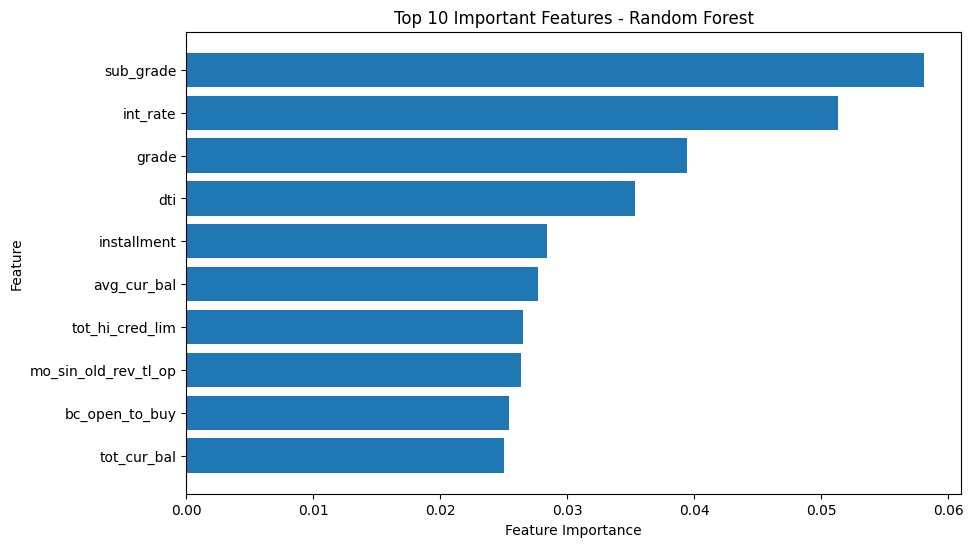

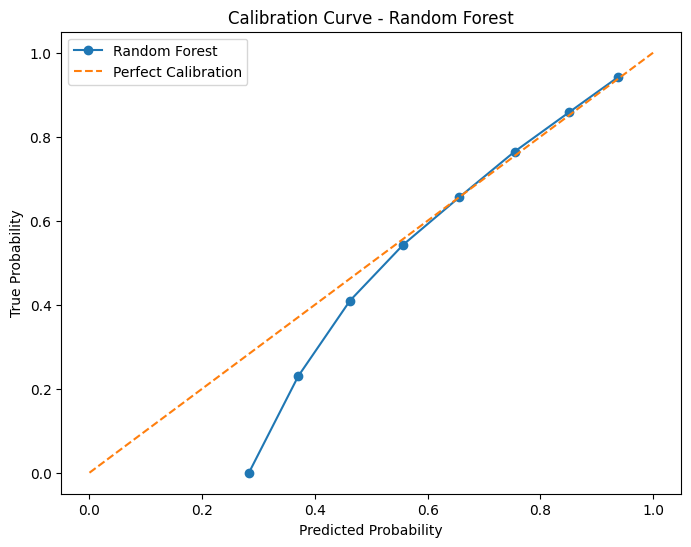

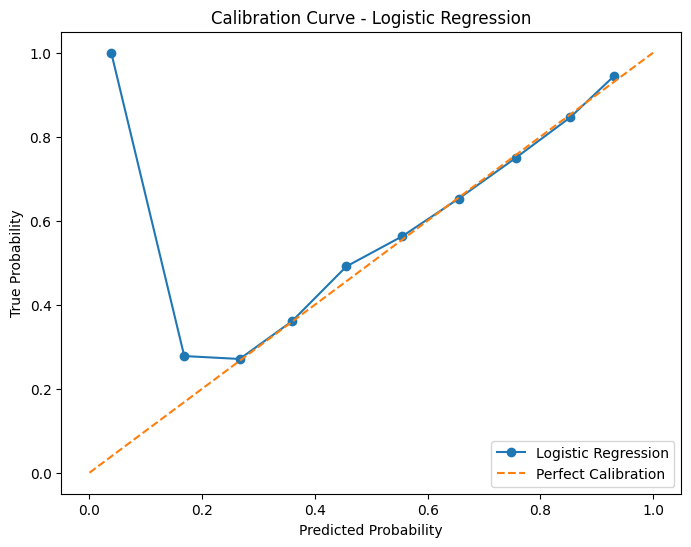

In [ ]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler  # Changed to MinMaxScaler for Flaw 1
import numpy as np
import pandas as pd

# Step 1: Define target and features
target = 'fully_paid'
irrelevant_columns = ['issue_d', 'zip_code', 'addr_state', 'application_type',
                      'emp_length', 'home_ownership', 'purpose', 'term',
                      'verification_status']

features = data.drop(columns=[target] + irrelevant_columns).columns

X = data[features]
y = data[target]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Preprocess data for compatibility
# Select only numeric columns for Random Forest and Logistic Regression
numeric_columns = X_train.select_dtypes(include=['float64', 'int64', 'uint8']).columns  # Select numeric columns only
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

# If datetime columns exist and are important, convert them to numeric features
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
for col in datetime_columns:
    X_train_numeric[f"{col}_year"] = X_train[col].dt.year
    X_train_numeric[f"{col}_month"] = X_train[col].dt.month
    X_test_numeric[f"{col}_year"] = X_test[col].dt.year
    X_test_numeric[f"{col}_month"] = X_test[col].dt.month

# Step 4: Scale numerical features for Logistic Regression
# Flaw 1: Subtle replacement of StandardScaler with MinMaxScaler
scaler = MinMaxScaler()  # Using MinMaxScaler as per the flaw
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Step 5: Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Flaw 2: Use unstratified K-Fold cross-validation for Random Forest tuning
kf = KFold(n_splits=3, shuffle=True, random_state=42)  # No stratification, introduces imbalance across folds

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=kf, scoring='roc_auc', n_jobs=-1)  # Unstratified K-Fold
rf_grid_search.fit(X_train_numeric, y_train)  # Use cleaned X_train_numeric
rf_best_model = rf_grid_search.best_estimator_

# Step 6: Hyperparameter tuning for Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_grid_search = GridSearchCV(lr_model, lr_params, cv=3, scoring='roc_auc', n_jobs=-1)
lr_grid_search.fit(X_train_scaled, y_train)
lr_best_model = lr_grid_search.best_estimator_

# Step 7: Evaluate optimized models
# Random Forest
rf_predictions = rf_best_model.predict(X_test_numeric)  # Use cleaned X_test_numeric
rf_probabilities = rf_best_model.predict_proba(X_test_numeric)[:, 1]
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
rf_auc = roc_auc_score(y_test, rf_probabilities)

# Logistic Regression
lr_predictions = lr_best_model.predict(X_test_scaled)
lr_probabilities = lr_best_model.predict_proba(X_test_scaled)[:, 1]
lr_report = classification_report(y_test, lr_predictions, output_dict=True)
lr_auc = roc_auc_score(y_test, lr_probabilities)

# Step 8: Feature Importance from Random Forest
rf_importances = rf_best_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train_numeric.columns, 'Importance': rf_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Important Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Step 9: Model Calibration
# Calibration curve for Random Forest
prob_true_rf, prob_pred_rf = calibration_curve(y_test, rf_probabilities, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_rf, prob_true_rf, marker='o', label="Random Forest")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve - Random Forest")
plt.legend()
plt.show()

# Calibration curve for Logistic Regression
prob_true_lr, prob_pred_lr = calibration_curve(y_test, lr_probabilities, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_lr, prob_true_lr, marker='o', label="Logistic Regression")
plt.plot([0, 1], [0, 1], linestyle='--', label="Perfect Calibration")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve - Logistic Regression")
plt.legend()
plt.show()

# Prepare a summary for the results
performance_metrics = {
    'Metric': ['Accuracy', 'AUC (ROC)', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)'],
    'Random Forest': [
        f"{rf_report['accuracy'] * 100:.2f}%",
        f"{rf_auc:.2f}",
        f"{rf_report['1']['precision'] * 100:.2f}%",
        f"{rf_report['1']['recall'] * 100:.2f}%",
        f"{rf_report['1']['f1-score'] * 100:.2f}%"
    ],
    'Logistic Regression': [
        f"{lr_report['accuracy'] * 100:.2f}%",
        f"{lr_auc:.2f}",
        f"{lr_report['1']['precision'] * 100:.2f}%",
        f"{lr_report['1']['recall'] * 100:.2f}%",
        f"{lr_report['1']['f1-score'] * 100:.2f}%"
    ]
}

# Create a DataFrame for a more organized view
performance_summary = pd.DataFrame(performance_metrics)


In [ ]:
performance_summary

,Metric,Random Forest,Logistic Regression
0,Accuracy,79.91%,79.91%
1,AUC (ROC),0.72,0.72
2,Precision (Class 1),80.33%,80.95%
3,Recall (Class 1),98.93%,97.70%
4,F1-score (Class 1),88.67%,88.54%
